In [1]:
import numpy as np
import pandas
from keras.layers import *
from keras.models import Sequential, Model
import keras
import pca2
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [2]:
df = pandas.read_csv("04-16_NBA_rookies_data.csv", header=None)
df1 = pandas.read_csv("04-16_NBA_rookies_label.csv",header=None)
df_test = pandas.read_csv("2017rookies_data.csv",header=None)
df1_test = pandas.read_csv("2017rookies_name.csv",header=None)
ds = df.values
ds1 = df1.values
lowDDataMat,reconMat=pca2.pca(ds)  #pca
ds_test = df_test.values
lowDDataMat1,reconMat1=pca2.pca(ds_test)  #pca
ds1_test = df1_test.values
x_train = ds[:,0:23]
y_train = ds1[:,1]
x_test = ds_test[:,0:23]
y_test = ds1_test[:,0]

dim = x_train.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [4]:
plot_model(model, to_file = 'model_for_Best_5_rookies.png', show_shapes = True)

In [3]:
idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.2,epochs=40,shuffle=True)
dnn_predict = model.predict_classes(x_test)
print(sum(dnn_predict))
print(y_test[dnn_predict == 1])

Train on 359 samples, validate on 90 samples
Epoch 1/40
359/359 [==============================] - 0s 849us/step - loss: 0.4666 - acc: 0.8217 - val_loss: 0.2984 - val_acc: 0.9000
Epoch 2/40
359/359 [==============================] - 0s 76us/step - loss: 0.2947 - acc: 0.8942 - val_loss: 0.2697 - val_acc: 0.9000
Epoch 3/40
359/359 [==============================] - 0s 78us/step - loss: 0.3063 - acc: 0.8747 - val_loss: 0.2768 - val_acc: 0.9000
Epoch 4/40
359/359 [==============================] - 0s 77us/step - loss: 0.3324 - acc: 0.8858 - val_loss: 0.2879 - val_acc: 0.9000
Epoch 5/40
359/359 [==============================] - 0s 74us/step - loss: 0.3099 - acc: 0.8997 - val_loss: 0.2743 - val_acc: 0.8889
Epoch 6/40
359/359 [==============================] - 0s 137us/step - loss: 0.2743 - acc: 0.9248 - val_loss: 0.2726 - val_acc: 0.8889
Epoch 7/40
359/359 [==============================] - 0s 80us/step - loss: 0.2382 - acc: 0.9081 - val_loss: 0.2805 - val_acc: 0.8889
Epoch 8/40
359/359 [==

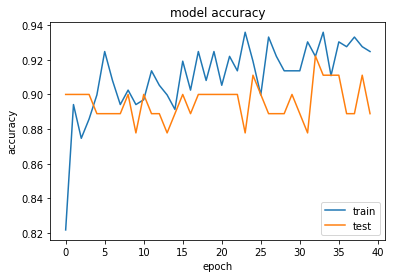

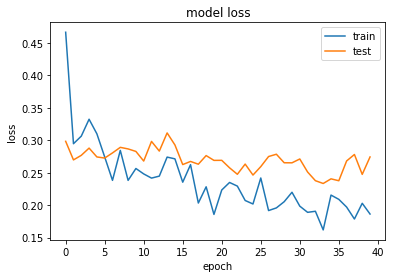

In [4]:
plt.figure(1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()